In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date,datetime


import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [98]:
df = pd.read_csv('telecom_churn_data.csv')

### Analyzing the Data

In [99]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [100]:
df.shape

(99999, 226)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [102]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [103]:
df.describe

<bound method NDFrame.describe of        mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
1                 0.0      

In [104]:
df.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [105]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [106]:
df.isnull().sum()/ len(df) *100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [107]:
## lets check the correlations between the columns
df.corr()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
mobile_number            1.000000        NaN             NaN             NaN   
circle_id                     NaN        NaN             NaN             NaN   
loc_og_t2o_mou                NaN        NaN             NaN             NaN   
std_og_t2o_mou                NaN        NaN             NaN             NaN   
loc_ic_t2o_mou                NaN        NaN             NaN             NaN   
arpu_6                   0.017617        NaN             NaN             NaN   
arpu_7                   0.017040        NaN             NaN             NaN   
arpu_8                   0.017017        NaN             NaN             NaN   
arpu_9                   0.022268        NaN             NaN             NaN   
onnet_mou_6             -0.004194        NaN             NaN             NaN   
onnet_mou_7             -0.006066        NaN             NaN             NaN   
onnet_mou_8             -0.007226        NaN             NaN             NaN   
onnet_mou_9             -0.010453        NaN             NaN             NaN   
offnet_mou_6             0.007079        NaN             NaN             NaN   
offnet_mou_7             0.002739        NaN             NaN             NaN   
offnet_mou_8            -0.000731        NaN             NaN             NaN   
offnet_mou_9             0.000046        NaN             NaN             NaN   
roam_ic_mou_6            0.001728        NaN             NaN             NaN   
roam_ic_mou_7           -0.001392        NaN             NaN             NaN   
roam_ic_mou_8            0.000418        NaN             NaN             NaN   
roam_ic_mou_9            0.003079        NaN             NaN             NaN   
roam_og_mou_6           -0.000942        NaN             NaN             NaN   
roam_og_mou_7           -0.004691        NaN             NaN             NaN   
roam_og_mou_8           -0.004593        NaN             NaN             NaN   
roam_og_mou_9            0.001819        NaN             NaN             NaN   
loc_og_t2t_mou_6         0.037080        NaN             NaN             NaN   
loc_og_t2t_mou_7         0.034418        NaN             NaN             NaN   
loc_og_t2t_mou_8         0.034503        NaN             NaN             NaN   
loc_og_t2t_mou_9         0.031258        NaN             NaN             NaN   
loc_og_t2m_mou_6         0.063149        NaN             NaN             NaN   
loc_og_t2m_mou_7         0.060791        NaN             NaN             NaN   
loc_og_t2m_mou_8         0.063004        NaN             NaN             NaN   
loc_og_t2m_mou_9         0.062683        NaN             NaN             NaN   
loc_og_t2f_mou_6         0.047495        NaN             NaN             NaN   
loc_og_t2f_mou_7         0.047361        NaN             NaN             NaN   
loc_og_t2f_mou_8         0.047660        NaN             NaN             NaN   
loc_og_t2f_mou_9         0.050264        NaN             NaN             NaN   
loc_og_t2c_mou_6        -0.009552        NaN             NaN             NaN   
loc_og_t2c_mou_7        -0.012828        NaN             NaN             NaN   
loc_og_t2c_mou_8        -0.014253        NaN             NaN             NaN   
loc_og_t2c_mou_9        -0.010799        NaN             NaN             NaN   
loc_og_mou_6             0.065737        NaN             NaN             NaN   
loc_og_mou_7             0.062702        NaN             NaN             NaN   
loc_og_mou_8             0.063891        NaN             NaN             NaN   
loc_og_mou_9             0.062007        NaN             NaN             NaN   
std_og_t2t_mou_6        -0.027392        NaN             NaN             NaN   
std_og_t2t_mou_7        -0.027372        NaN             NaN             NaN   
std_og_t2t_mou_8        -0.027426        NaN             NaN             NaN   
std_og_t2t_mou_9        -0.029643        NaN             NaN             NaN   
std_og_t2m_mou_6    

### Cleaning the Data

In [108]:
## lets find the columns that have the largest amount of its data missing or null
df.isnull().sum()/ len(df) *100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [109]:
## lets take care of the missing values of the columns that have dates in them

columns_with_dates = [date for date in df.columns if 'date' in date]
columns_with_numbs = [nums for nums in df.columns if nums not in columns_with_dates]


In [110]:
columns_with_dates

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [111]:
columns_with_numbs

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6'

In [112]:
df[columns_with_numbs] = df[columns_with_numbs].fillna(0)

In [113]:
df[columns_with_dates]

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0                6/30/2014            7/31/2014            8/31/2014   
1                6/30/2014            7/31/2014            8/31/2014   
2                6/30/2014            7/31/2014            8/31/2014   
3                6/30/2014            7/31/2014            8/31/2014   
4                6/30/2014            7/31/2014            8/31/2014   
...                    ...                  ...                  ...   
99994            6/30/2014            7/31/2014            8/31/2014   
99995            6/30/2014            7/31/2014            8/31/2014   
99996            6/30/2014            7/31/2014            8/31/2014   
99997            6/30/2014            7/31/2014            8/31/2014   
99998            6/30/2014            7/31/2014            8/31/2014   

      last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0                9/30/2014           6/21/2014           7/16/2014   
1                9/30/2014           6/29/2014           7/31/2014   
2                9/30/2014           6/17/2014           7/24/2014   
3                9/30/2014           6/28/2014           7/31/2014   
4                9/30/2014           6/26/2014           7/28/2014   
...                    ...                 ...                 ...   
99994            9/30/2014            6/3/2014           7/20/2014   
99995            9/30/2014           6/17/2014           7/17/2014   
99996            9/30/2014           6/13/2014           7/26/2014   
99997            9/30/2014           6/17/2014           7/19/2014   
99998            9/30/2014           6/16/2014                 NaN   

      date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0                8/8/2014           9/28/2014                6/21/2014   
1               8/28/2014           9/30/2014                      NaN   
2               8/14/2014           9/29/2014                      NaN   
3               8/31/2014           9/30/2014                      NaN   
4                8/9/2014           9/28/2014                 6/4/2014   
...                   ...                 ...                      ...   
99994           8/26/2014           9/25/2014                      NaN   
99995           8/24/2014           9/26/2014                      NaN   
99996                 NaN            9/2/2014                6/13/2014   
99997           8/20/2014           9/17/2014                6/17/2014   
99998                 NaN                 NaN                6/11/2014   

      date_of_last_rech_data_7 date_of_last_rech_data_8  \
0                    7/16/2014                 8/8/2014   
1                    7/25/2014                8/10/2014   
2                          NaN                      NaN   
3                          NaN                      NaN   
4                          NaN                      NaN   
...                        ...                      ...   
99994                      NaN                      NaN   
99995                      NaN                      NaN   
99996                      NaN                      NaN   
99997                7/19/2014                8/20/2014   
99998                      NaN                      NaN   

      date_of_last_rech_data_9  
0                          NaN  
1                          NaN  
2                    9/17/2014  
3                          NaN  
4                          NaN  
...                        ...  
99994                      NaN  
99995                      NaN  
99996                      NaN  
99997                9/17/2014  
99998                      NaN  

[99999 rows x 12 columns]

In [114]:
## as we can see from the above output that some of the date values are NaN and for the last few columns
## most of the values are NaN, we either have to fill them with a date or remove them


In [115]:
df['last_date_of_month_7'].isnull().sum()

601

In [116]:
df['last_date_of_month_8'].isnull().sum()

1100

In [117]:
df['last_date_of_month_9'].isnull().sum()

1659

In [118]:
## we'll go ahead and fill them witha default value of the end of the month for each of 7,8,9 months
df['last_date_of_month_7'].fillna('7/31/2014', inplace=True)
df['last_date_of_month_8'].fillna('8/31/2014', inplace=True)
df['last_date_of_month_9'].fillna('9/30/2014', inplace=True)

In [119]:
df['last_date_of_month_7'].isnull().sum(), df['last_date_of_month_8'].isnull().sum(), df['last_date_of_month_9'].isnull().sum()

(0, 0, 0)

In [120]:
df.shape

(99999, 226)

In [121]:
df[columns_with_dates].dtypes

last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_9         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
date_of_last_rech_data_9    object
dtype: object

In [122]:
## Now that the dates have been filled we can go ahead and change those columns into datetime objects
df[columns_with_dates]=df[columns_with_dates].fillna(datetime.strptime(str(date.max), '%Y-%m-%d').strftime('%m/%d/%Y'))

In [123]:
df[columns_with_dates].dtypes

last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_9         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
date_of_last_rech_data_9    object
dtype: object

In [124]:
## lets check the null values in the set
df.isnull().sum()/ len(df) *100

mobile_number               0.0
circle_id                   0.0
loc_og_t2o_mou              0.0
std_og_t2o_mou              0.0
loc_ic_t2o_mou              0.0
last_date_of_month_6        0.0
last_date_of_month_7        0.0
last_date_of_month_8        0.0
last_date_of_month_9        0.0
arpu_6                      0.0
arpu_7                      0.0
arpu_8                      0.0
arpu_9                      0.0
onnet_mou_6                 0.0
onnet_mou_7                 0.0
onnet_mou_8                 0.0
onnet_mou_9                 0.0
offnet_mou_6                0.0
offnet_mou_7                0.0
offnet_mou_8                0.0
offnet_mou_9                0.0
roam_ic_mou_6               0.0
roam_ic_mou_7               0.0
roam_ic_mou_8               0.0
roam_ic_mou_9               0.0
roam_og_mou_6               0.0
roam_og_mou_7               0.0
roam_og_mou_8               0.0
roam_og_mou_9               0.0
loc_og_t2t_mou_6            0.0
loc_og_t2t_mou_7            0.0
loc_og_t

In [125]:
## as we can see from the above the percentage of NaN values have been change to zero, now we have to still change
## them from zero to appropriate valuse such as mean, meadian or mode of the data set so we can make proper predictions

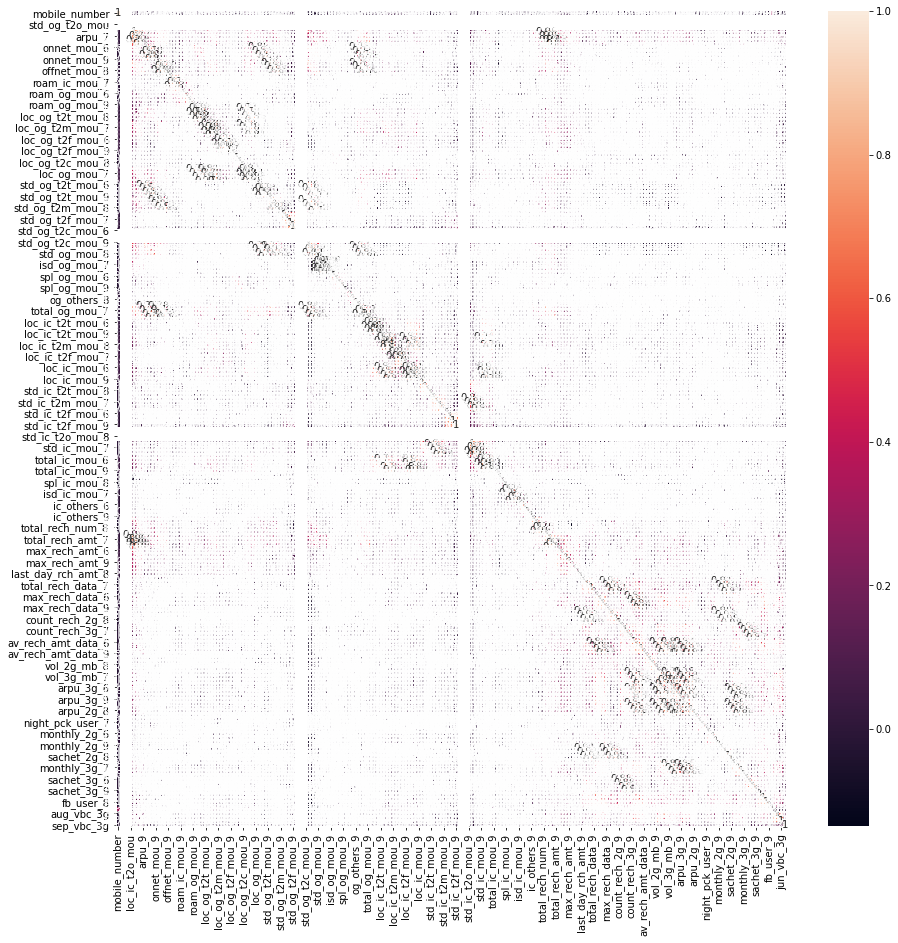

In [126]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [127]:
## lets get some of the important columns and check the number of unique values in thoses columns
check_unique_vals = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
for i in check_unique_vals: 
    print("column %s Unique Vals %s" % (i,df[i].unique()))

column loc_og_t2o_mou Unique Vals [0.]
column std_og_t2o_mou Unique Vals [0.]
column loc_ic_t2o_mou Unique Vals [0.]
column last_date_of_month_7 Unique Vals ['7/31/2014']
column last_date_of_month_8 Unique Vals ['8/31/2014']
column last_date_of_month_9 Unique Vals ['9/30/2014']
column date_of_last_rech_7 Unique Vals ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' '12/31/9999' '7/26/2014' '7/11/2014' '7/6/2014'
 '7/21/2014' '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014'
 '7/8/2014' '7/1/2014']
column date_of_last_rech_8 Unique Vals ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/2014'
 '8/25/2014' '8/19/2014' '8/22/2014' '8/2/2014' '8/13/2014' '8/5/2014'
 '8/18/2014' '8/20/2014' '8/23/2014' '8/12/20

### Deriving new Features

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. We'll use our business understanding to derive features we think could be important indicators of churn.

In [128]:
## we can see from the table that we can subtract some columns and add other columns together to make new columns
## we will proceed the following way:
## we can see that we can subtract total)ic_mou_ columns from total_og_mou_ to derive a column that is the difference of both
## we can also do the same for columns vol_3g_mb_ and vol_2g_mb_
## we can create a sum of total service packs column that will aggregate the columns with fb and sachet in it



In [129]:
df['total_ic_mou_6'], df['total_og_mou_6']

(0          0.00
 1         26.83
 2        370.04
 3        280.08
 4        216.44
           ...  
 99994     93.09
 99995     56.11
 99996    473.69
 99997      0.81
 99998    788.73
 Name: total_ic_mou_6, Length: 99999, dtype: float64,
 0          0.00
 1         40.31
 2        155.33
 3        223.23
 4        127.28
           ...  
 99994     20.59
 99995    130.09
 99996     25.14
 99997      0.00
 99998    269.93
 Name: total_og_mou_6, Length: 99999, dtype: float64)

In [130]:
## diff_ic_og_ ==> ic_og_difference , diff_vol_3g_2g_ ==> 3g_2g_difference  , total_service_packs_ ==> total_user_service, 
for i in range(6,10):
    df['ic_og_difference_'+str(i)] = df['total_ic_mou_'+str(i)] - df['total_og_mou_'+str(i)]
    df['3g_2g_difference_'+str(i)] = df['vol_3g_mb_'+str(i)] - df['vol_2g_mb_'+str(i)]
    df['total_user_service_'+str(i)] = df['night_pck_user_'+str(i)] + df['monthly_2g_'+str(i)] + df['sachet_2g_6'] + df['monthly_3g_6'] + df['sachet_3g_6'] + df['fb_user_6']
    
    
    

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 238 entries, mobile_number to total_user_service_9
dtypes: float64(191), int64(35), object(12)
memory usage: 181.6+ MB


In [135]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100         0.00   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00            0.0           0.00           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0           0.00            0.0           0.00           0.00           0.00   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              0.00              0.00              0.00              0.00   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00              0.00              0.00              0.00   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [136]:
for i in range(6,10):
    print(df['ic_og_difference_'+str(i)], df['3g_2g_difference_'+str(i)], df['total_user_service_'+str(i)])

0          0.00
1        -13.48
2        214.71
3         56.85
4         89.16
          ...  
99994     72.50
99995    -73.98
99996    448.55
99997      0.81
99998    518.80
Name: ic_og_difference_6, Length: 99999, dtype: float64 0          53.44
1           0.00
2           0.00
3           0.00
4           0.00
          ...   
99994       0.00
99995       0.00
99996     275.64
99997    1377.12
99998     126.59
Name: 3g_2g_difference_6, Length: 99999, dtype: float64 0        2.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
99994    0.0
99995    0.0
99996    3.0
99997    4.0
99998    2.0
Name: total_user_service_6, Length: 99999, dtype: float64
0          0.00
1        -74.30
2        106.59
3         81.30
4        -43.04
          ...  
99994     12.04
99995     -5.76
99996      0.00
99997     11.09
99998      0.00
Name: ic_og_difference_7, Length: 99999, dtype: float64 0         149.44
1        -108.07
2           0.00
3           0.00
4           0.00
       

In [137]:
df['total_active_difference'] = df['total_user_service_6'] + df['total_user_service_7'] - df['total_user_service_8']


In [138]:
df['total_active_difference']

0        2.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
99994    0.0
99995    0.0
99996    3.0
99997    4.0
99998    2.0
Name: total_active_difference, Length: 99999, dtype: float64

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 239 entries, mobile_number to total_active_difference
dtypes: float64(192), int64(35), object(12)
memory usage: 182.3+ MB


In [140]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100         0.00   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00            0.0           0.00           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0           0.00            0.0           0.00           0.00           0.00   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              0.00              0.00              0.00              0.00   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00              0.00              0.00              0.00   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [141]:
columns_to_impute = ['ic','og']
for i in range(len(columns_to_impute)):
    df[columns_to_impute[i]+'_active_phase_difference'] = df['total_'+columns_to_impute[i]+'_mou_6']+df['total_'+columns_to_impute[i]+'_mou_7'] - df['total_'+columns_to_impute[i]+'_mou_8']
    
    

In [142]:
columns_to_impute = ['2g','3g']
for i in range(len(columns_to_impute)):
    df[columns_to_impute[i]+'_active_phase_difference'] = df['vol_'+columns_to_impute[i]+'_mb_6'] + df['vol_'+columns_to_impute[i]+'_mb_7'] - df['vol_'+columns_to_impute[i]+'_mb_8']
    
    

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 243 entries, mobile_number to 3g_active_phase_difference
dtypes: float64(196), int64(35), object(12)
memory usage: 185.4+ MB


In [144]:
df['2g_active_phase_difference']

0         25.70
1       -257.40
2          0.00
3          0.00
4          0.00
          ...  
99994      0.00
99995      0.00
99996      0.21
99997    181.81
99998     26.11
Name: 2g_active_phase_difference, Length: 99999, dtype: float64

In [145]:
res = df['total_rech_amt_6'] + df['total_rech_amt_7'] - df['total_rech_amt_8']
df['user_total_active_amt']= res


In [146]:
df['3g_active_phase_difference']

0        124.72
1          0.00
2          0.00
3          0.00
4          0.00
          ...  
99994      0.00
99995      0.00
99996    275.85
99997    152.41
99998    152.70
Name: 3g_active_phase_difference, Length: 99999, dtype: float64

In [147]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100         0.00   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00            0.0           0.00           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0           0.00            0.0           0.00           0.00           0.00   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              0.00              0.00              0.00              0.00   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00              0.00              0.00              0.00   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

### Filter high-value customers

As mentioned above, we need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

 

After filtering the high-value customers, we should get about 29.9k rows.

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 244 entries, mobile_number to user_total_active_amt
dtypes: float64(196), int64(36), object(12)
memory usage: 186.2+ MB


In [151]:
## the high value customers info should be in av_rech and total_rech columns, 
## so well go ahead and multiply and then add the result to each other and make a column out of it
total_rech_6 = df['total_rech_data_6'] * df['av_rech_amt_data_6']
total_rech_7 = df['total_rech_data_7'] * df['av_rech_amt_data_7']
df['rech_data_total'] = total_rech_6 + total_rech_7

In [152]:
df['rech_data_total']

0         504.0
1         154.0
2           0.0
3           0.0
4          56.0
          ...  
99994       0.0
99995       0.0
99996      78.0
99997    2465.0
99998     154.0
Name: rech_data_total, Length: 99999, dtype: float64

In [154]:
total_rech = df['total_rech_amt_6'] + df['total_rech_amt_7']
df['good_phase_total'] = total_rech

In [155]:
total_amt = df['rech_data_total'] + df['good_phase_total']

In [156]:
df['good_phase_amt_total'] = total_amt

In [157]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100         0.00   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00            0.0           0.00           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0           0.00            0.0           0.00           0.00           0.00   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              0.00              0.00              0.00              0.00   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00              0.00              0.00              0.00   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [158]:
len(df.columns)

247

In [159]:
df['good_phase_amt_total']

0        1118.0
1         612.0
2         483.0
3         540.0
4         602.0
          ...  
99994     170.0
99995     220.0
99996     197.0
99997    3204.0
99998     864.0
Name: good_phase_amt_total, Length: 99999, dtype: float64

In [160]:
## now lets extract the percentiles
df['good_phase_amt_total'].describe()

count     99999.000000
mean        970.656135
std        1738.847187
min           0.000000
25%         256.000000
50%         550.000000
75%        1106.000000
max      122472.000000
Name: good_phase_amt_total, dtype: float64

In [161]:
df['good_phase_amt_total'].describe(percentiles=[.7])

count     99999.000000
mean        970.656135
std        1738.847187
min           0.000000
50%         550.000000
70%         956.000000
max      122472.000000
Name: good_phase_amt_total, dtype: float64

In [162]:
## as we can see from the above that the 70th percentile fall in the 956
## we will go ahead and filter the data and take out the customers that have value of 956 or higher
customers_70_percentile = df[df['good_phase_amt_total'] >955]

In [163]:
customers_70_percentile

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
7         7000701601        109             0.0             0.0   
8         7001524846        109             0.0             0.0   
21        7002124215        109             0.0             0.0   
23        7000887461        109             0.0             0.0   
...              ...        ...             ...             ...   
99981     7000630859        109             0.0             0.0   
99984     7000661676        109             0.0             0.0   
99986     7001729035        109             0.0             0.0   
99988     7002111859        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
7                 0.0            6/30/2014            7/31/2014   
8                 0.0            6/30/2014            7/31/2014   
21                0.0            6/30/2014            7/31/2014   
23                0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99981             0.0            6/30/2014            7/31/2014   
99984             0.0            6/30/2014            7/31/2014   
99986             0.0            6/30/2014            7/31/2014   
99988             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8  \
0                8/31/2014            9/30/2014   197.385   214.816   213.803   
7                8/31/2014            9/30/2014  1069.180  1349.850  3171.480   
8                8/31/2014            9/30/2014   378.721   492.223   137.362   
21               8/31/2014            9/30/2014   514.453   597.753   637.760   
23               8/31/2014            9/30/2014    74.350   193.897   366.966   
...                    ...                  ...       ...       ...       ...   
99981            8/31/2014            9/30/2014   384.316   255.405   393.474   
99984            8/31/2014            9/30/2014   328.594   202.966   118.707   
99986            8/31/2014            9/30/2014   644.973   455.228   564.334   
99988            8/31/2014            9/30/2014   312.558   512.932   402.080   
99997            8/31/2014            9/30/2014   322.991   303.386   606.817   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       21.100         0.00         0.00         0.00         0.00   
7      500.000        57.84        54.68        52.29         0.00   
8      166.787       413.69       351.03        35.08        33.46   
21     578.596       102.41       132.11        85.14       161.63   
23     811.480        48.96        50.66        33.58        15.74   
...        ...          ...          ...          ...          ...   
99981   94.080        78.68        29.04       103.24        34.38   
99984  324.143       423.99       181.83         5.71         5.03   
99986  267.451       806.73       549.36       775.41       692.63   
99988  533.502       199.89       174.46         2.46         7.16   
99997  731.010         0.00         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0              0.00          0.00          0.00          0.00           0.00   
7            453.43        567.16        325.91          0.00          16.23   
8             94.66         80.63        136.48        108.71           0.00   
21           757.93        896.68        983.39        869.89           0.00   
23            85.41         89.36        205.89        111.88           0.00   
...             ...           ...           ...           ...            ...   
99981         56.13    

In [164]:
len(customers_70_percentile)

30001

In [167]:
print("The Number of High Value Customers are : %d\n"% len(customers_70_percentile))
print("The Percentage of High Value Customers are : {}%".format(round(len(customers_70_percentile)/df.shape[0]*100),2))

The Number of High Value Customers are : 30001

The Percentage of High Value Customers are : 30%


In [165]:
## as we can see there are over 30,000 high value customers

### Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [168]:
features_to_churn = ['total_ic_mou_9','total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
churners = ~customers_70_percentile[[x for x in features_to_churn ]].any(axis=1)

In [169]:
churners = churners.map({True:1, False:0})

In [170]:
customers_70_percentile['churn'] = churners

In [172]:
## now well calculate the number of churners and thier percentage
print("There Are {} Churners Out of {} High Value Customers.".format(len(customers_70_percentile[customers_70_percentile.churn == 1]),customers_70_percentile.shape[0]))
print("Percentage of High Value Customer Churn : {}%".format(round(len(customers_70_percentile[customers_70_percentile.churn == 1])/customers_70_percentile.shape[0] *100,2)))


There Are 2441 Churners Out of 30001 High Value Customers.
Percentage of High Value Customer Churn : 8.14%


##### as we can see from the above there are 2441 customer from a total of 30,001 customers who have churned
##### the percentage is roughly 8.14% of High value customers
##### this means that out of the High Value customers there are 27,560 customers who are non-churners
##### this equates to around 91.86 percent of the high value customers

loc_ic_mou_6  std_ic_mou_6  isd_ic_mou_6  roam_ic_mou_6  spl_ic_mou_6  \
count  30001.000000  30001.000000  30001.000000   30001.000000  30001.000000   
mean     231.153776     46.789434     10.784689      16.110355      0.061035   
std      314.821196    137.501469     76.729297      76.302156      0.188058   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%       47.880000      1.030000      0.000000       0.000000      0.000000   
50%      134.490000     11.410000      0.000000       0.000000      0.000000   
75%      297.140000     41.490000      0.000000       0.000000      0.000000   
max     7454.630000   5459.630000   6789.410000    2613.310000     19.760000   

        ic_others_6  total_ic_mou_6  loc_ic_mou_7  std_ic_mou_7  isd_ic_mou_7  \
count  30001.000000    30001.000000  30001.000000  30001.000000  30001.000000   
mean       1.153449      289.950496    234.307412     49.046114     11.875796   
std       13.985934      365.523475    315.995071    148.161116     80.179312   
min        0.000000        0.000000      0.000000      0.000000      0.000000   
25%        0.000000       72.880000     52.510000      1.050000      0.000000   
50%        0.000000      183.730000    137.590000     12.090000      0.000000   
75%        0.050000      371.990000    298.710000     43.810000      0.000000   
max     1344.140000     7716.140000   6466.740000   6745.760000   4747.910000   

       roam_ic_mou_7  spl_ic_mou_7   ic_others_7  total_ic_mou_7  \
count   30001.000000  30001.000000  30001.000000    30001.000000   
mean       12.642504      0.019765      1.500338      296.756987   
std        75.785903      0.181859     15.997307      373.747232   
min         0.000000      0.000000      0.000000        0.000000   
25%         0.000000      0.000000      0.000000       78.990000   
50%         0.000000      0.000000      0.000000      187.580000   
75%         0.000000      0.000000      0.000000      377.310000   
max      3813.290000     21.330000   1495.940000     7442.860000   

       loc_ic_mou_8  std_ic_mou_8  isd_ic_mou_8  roam_ic_mou_8  spl_ic_mou_8  \
count  30001.000000  30001.000000  30001.000000   30001.000000  30001.000000   
mean     223.264679     44.401653     10.998257      12.500551      0.026567   
std      308.315153    138.813305     70.600636      74.125281      0.110697   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%       40.530000      0.410000      0.000000       0.000000      0.000000   
50%      128.730000      9.290000      0.000000       0.000000      0.000000   
75%      285.440000     38.380000      0.000000       0.000000      0.000000   
max     5388.740000   5957.140000   3432.880000    4169.810000      6.230000   

        ic_others_8  total_ic_mou_8  
count  30001.000000    30001.000000  
mean       1.224455      279.922931  
std       12.783238      361.175175  
min        0.000000        0.000000  
25%        0.000000       61.360000  
50%        0.000000      173.110000  
75%        0.000000      361.730000  
max     1209.860000     6066.630000

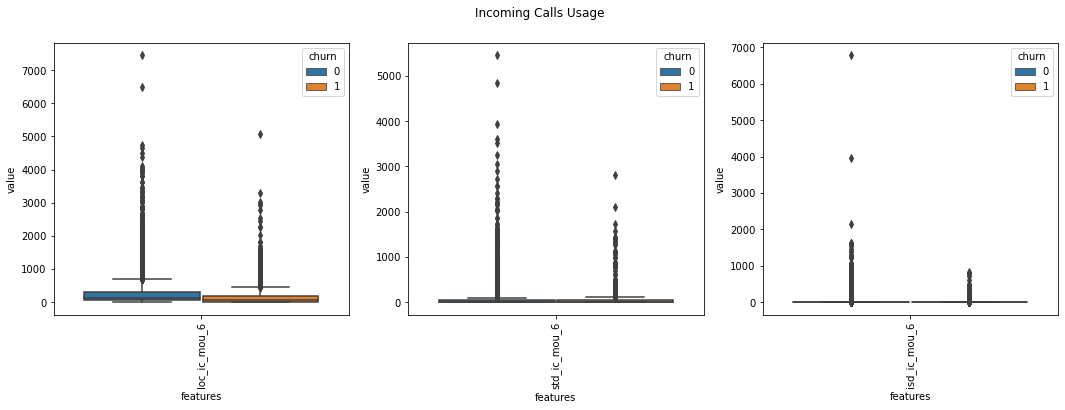

In [390]:
cols = ['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','roam_ic_mou_6','spl_ic_mou_6','ic_others_6','total_ic_mou_6','loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','roam_ic_mou_7','spl_ic_mou_7','ic_others_7','total_ic_mou_7','loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','roam_ic_mou_8','spl_ic_mou_8','ic_others_8','total_ic_mou_8']
display(customers_70_percentile[cols].describe())
plt.figure(figsize=(18, 5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([customers_70_percentile[cols[i]], customers_70_percentile['churn']], axis=1)
    X = pd.melt(X,id_vars="churn",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Incoming Calls Usage')

loc_og_mou_6  std_og_mou_6  isd_og_mou_6  roam_og_mou_6  spl_og_mou_6  \
count  30001.000000  30001.000000  30001.000000   30001.000000  30001.000000   
mean     254.080388    347.125955      2.171525      26.571547      5.818270   
std      378.339061    608.629048     45.852190     116.205525     17.567237   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%       32.260000      0.380000      0.000000       0.000000      0.000000   
50%      124.540000     45.130000      0.000000       0.000000      0.210000   
75%      332.090000    465.390000      0.000000       0.000000      5.210000   
max    10643.380000   8432.990000   5900.660000    3775.110000   1023.210000   

        og_others_6  total_og_mou_6  loc_og_mou_7  std_og_mou_7  isd_og_mou_7  \
count  30001.000000    30001.000000  30001.000000  30001.000000  30001.000000   
mean       0.661092      609.866251    255.116292    363.984508      2.105743   
std        4.107960      690.873430    375.418979    639.799336     45.545227   
min        0.000000        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      116.580000     34.480000      0.150000      0.000000   
50%        0.000000      410.630000    127.880000     43.980000      0.000000   
75%        0.000000      858.760000    333.390000    499.290000      0.000000   
max      609.810000    10674.030000   7674.780000  10936.730000   5490.280000   

       roam_og_mou_7  spl_og_mou_7   og_others_7  total_og_mou_7  \
count   30001.000000  30001.000000  30001.000000    30001.000000   
mean       20.152086      7.108646      0.042905      628.366047   
std        96.100428     21.788304      2.676794      717.219171   
min         0.000000      0.000000      0.000000        0.000000   
25%         0.000000      0.000000      0.000000      116.490000   
50%         0.000000      0.710000      0.000000      425.590000   
75%         0.000000      6.940000      0.000000      891.440000   
max      2812.040000   1265.790000    370.130000    11365.310000   

       loc_og_mou_8  std_og_mou_8  isd_og_mou_8  roam_og_mou_8  spl_og_mou_8  \
count  30001.000000  30001.000000  30001.000000   30001.000000  30001.000000   
mean     235.728174    307.379315      1.948970      19.865615      6.557204   
std      363.370172    608.976504     44.712024     104.719009     20.311857   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%       22.460000      0.000000      0.000000       0.000000      0.000000   
50%      110.810000     25.480000      0.000000       0.000000      0.430000   
75%      310.610000    357.230000      0.000000       0.000000      6.150000   
max    11039.910000  13980.060000   5681.540000    5337.040000    954.510000   

        og_others_8  total_og_mou_8  
count  30001.000000    30001.000000  
mean       0.057607      551.678812  
std        3.315125      700.478180  
min        0.000000        0.000000  
25%        0.000000       72.360000  
50%        0.000000      333.540000  
75%        0.000000      774.780000  
max      394.930000    14043.060000

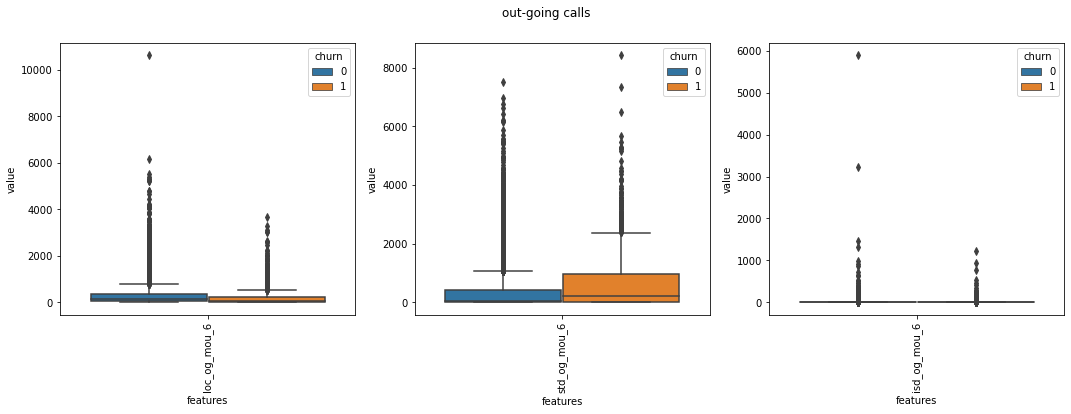

In [391]:
cols = ['loc_og_mou_6','std_og_mou_6','isd_og_mou_6','roam_og_mou_6','spl_og_mou_6','og_others_6','total_og_mou_6','loc_og_mou_7','std_og_mou_7','isd_og_mou_7','roam_og_mou_7','spl_og_mou_7','og_others_7','total_og_mou_7','loc_og_mou_8','std_og_mou_8','isd_og_mou_8','roam_og_mou_8','spl_og_mou_8','og_others_8','total_og_mou_8']
display(customers_70_percentile[cols].describe())
plt.figure(figsize=(18, 5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([customers_70_percentile[cols[i]], customers_70_percentile['churn']], axis=1)
    X = pd.melt(X,id_vars="churn",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('out-going calls')

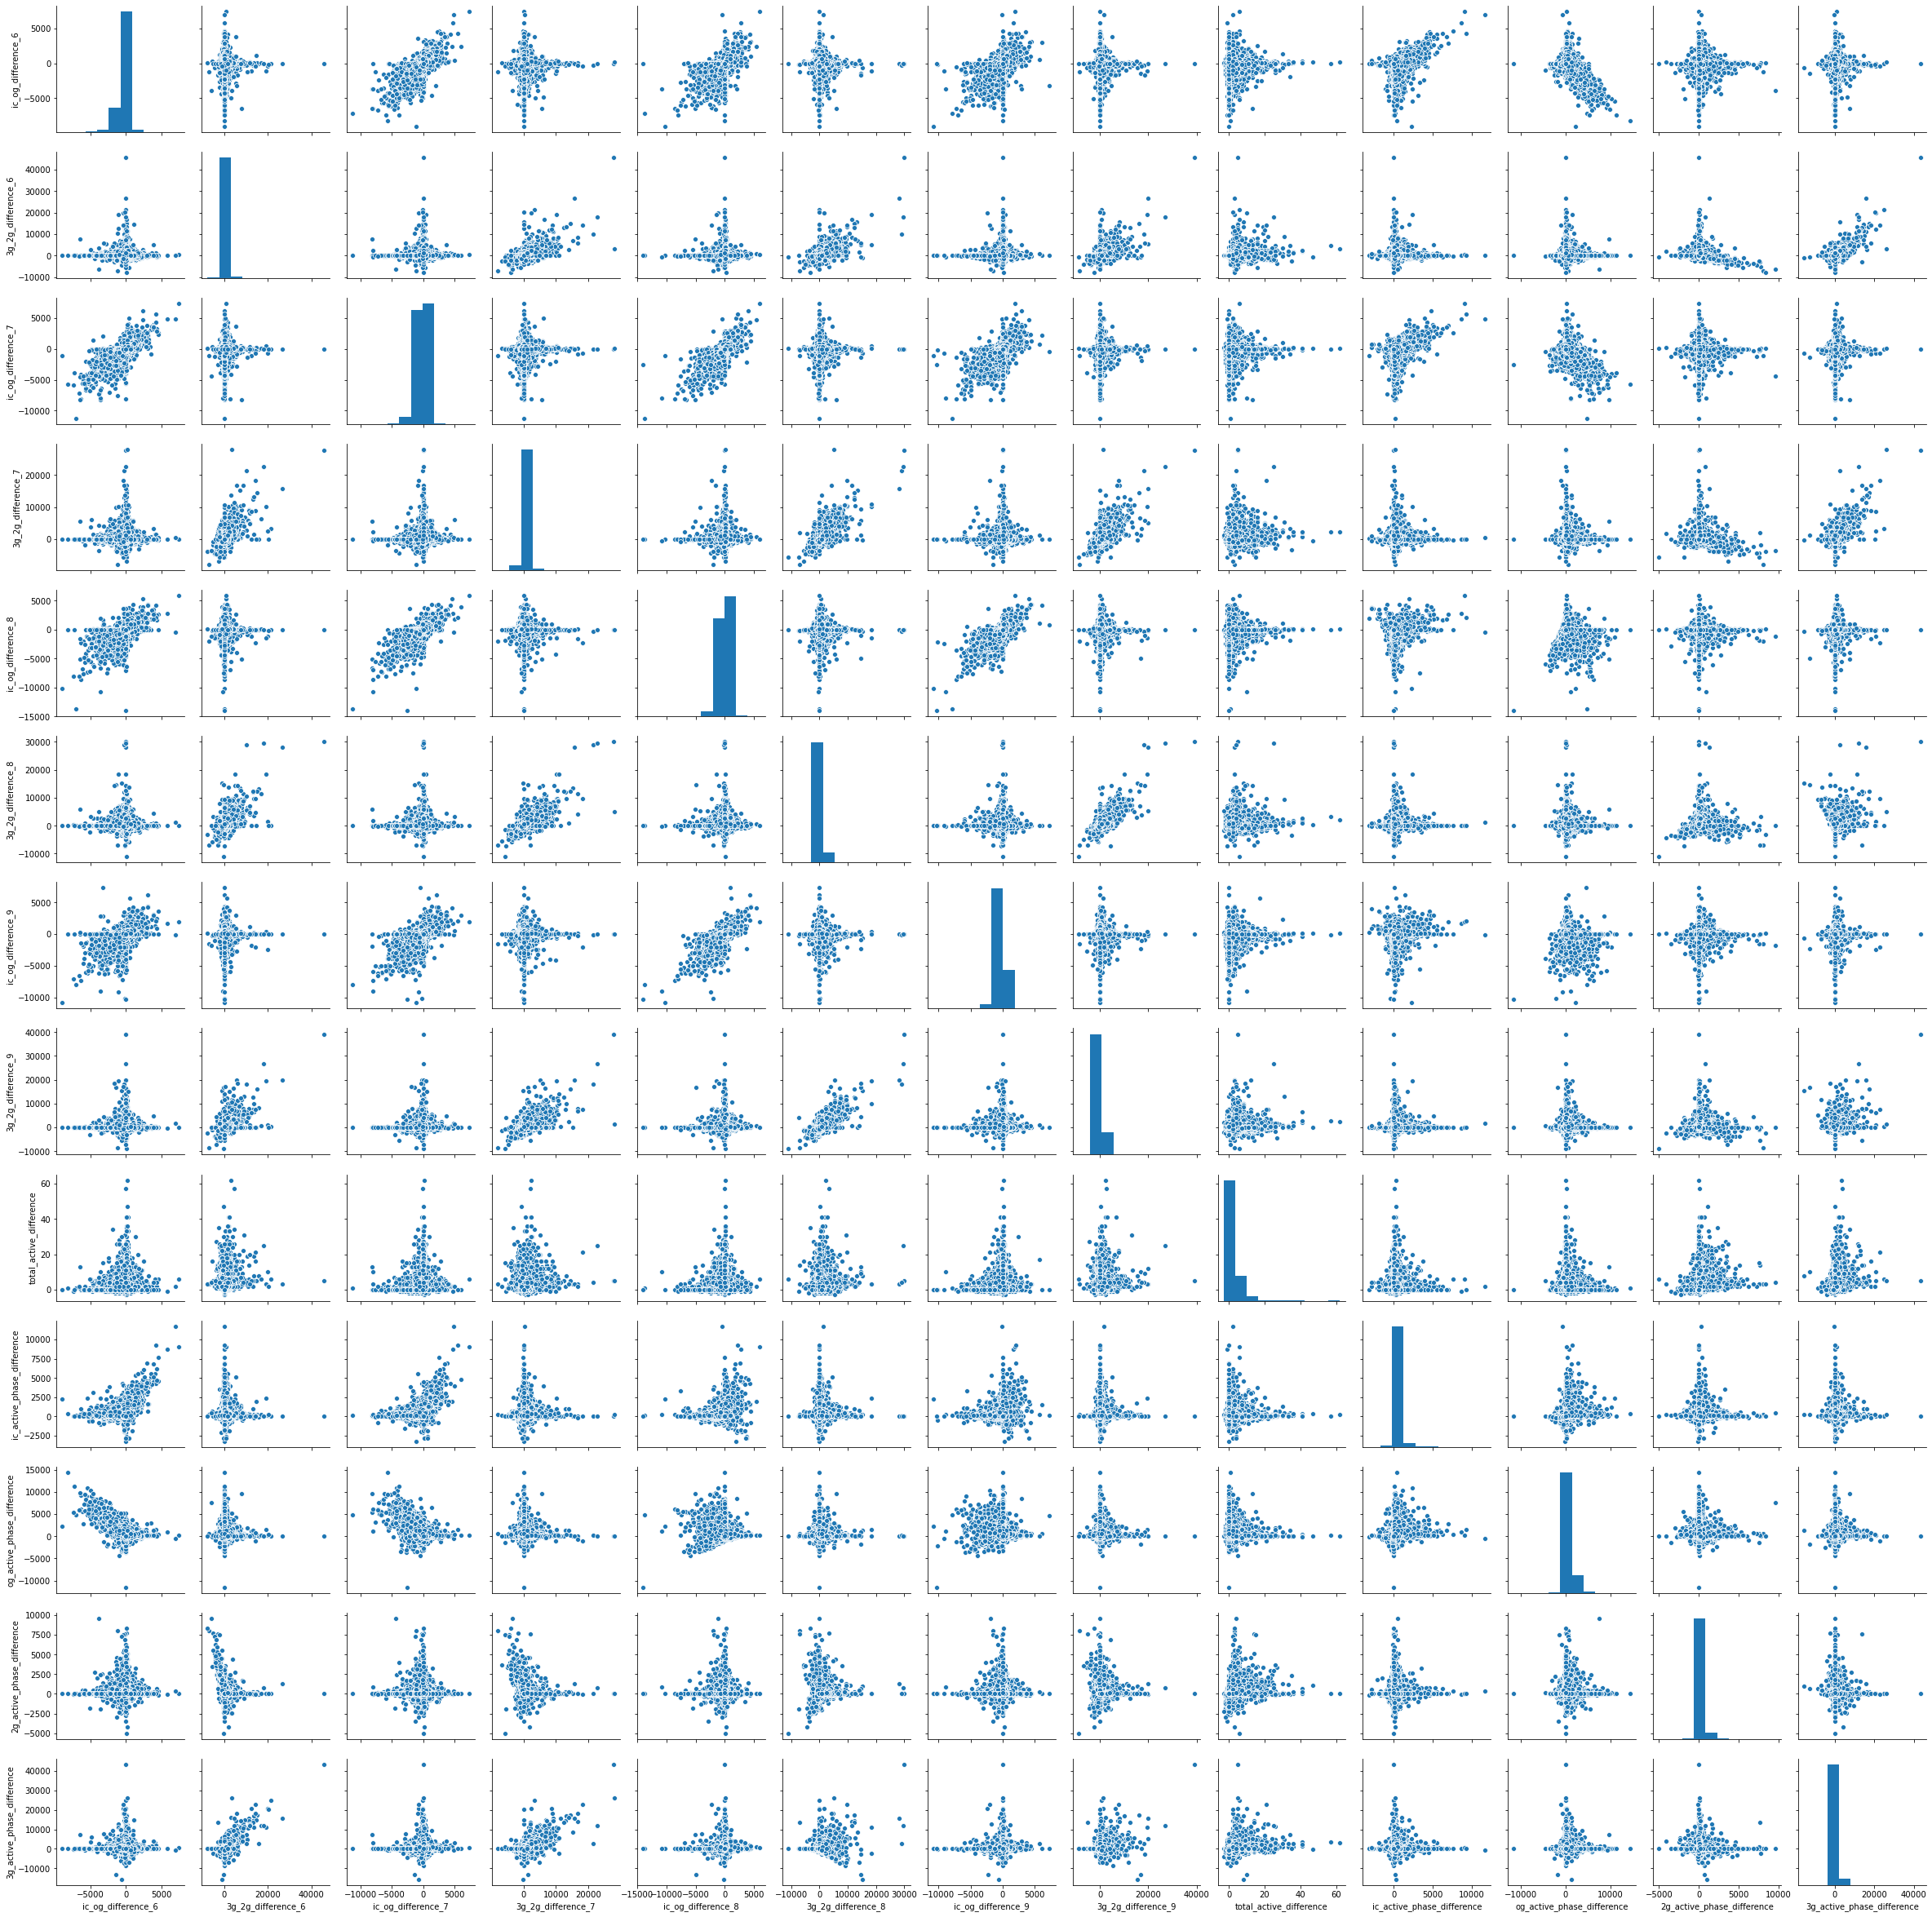

In [176]:
sns.pairplot(customers_70_percentile[[x for x in customers_70_percentile.columns if 'diff' in x]])
plt.show()
             

In [178]:
customers_70_percentile

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
7         7000701601        109             0.0             0.0   
8         7001524846        109             0.0             0.0   
21        7002124215        109             0.0             0.0   
23        7000887461        109             0.0             0.0   
...              ...        ...             ...             ...   
99981     7000630859        109             0.0             0.0   
99984     7000661676        109             0.0             0.0   
99986     7001729035        109             0.0             0.0   
99988     7002111859        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
7                 0.0            6/30/2014            7/31/2014   
8                 0.0            6/30/2014            7/31/2014   
21                0.0            6/30/2014            7/31/2014   
23                0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99981             0.0            6/30/2014            7/31/2014   
99984             0.0            6/30/2014            7/31/2014   
99986             0.0            6/30/2014            7/31/2014   
99988             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8  \
0                8/31/2014            9/30/2014   197.385   214.816   213.803   
7                8/31/2014            9/30/2014  1069.180  1349.850  3171.480   
8                8/31/2014            9/30/2014   378.721   492.223   137.362   
21               8/31/2014            9/30/2014   514.453   597.753   637.760   
23               8/31/2014            9/30/2014    74.350   193.897   366.966   
...                    ...                  ...       ...       ...       ...   
99981            8/31/2014            9/30/2014   384.316   255.405   393.474   
99984            8/31/2014            9/30/2014   328.594   202.966   118.707   
99986            8/31/2014            9/30/2014   644.973   455.228   564.334   
99988            8/31/2014            9/30/2014   312.558   512.932   402.080   
99997            8/31/2014            9/30/2014   322.991   303.386   606.817   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       21.100         0.00         0.00         0.00         0.00   
7      500.000        57.84        54.68        52.29         0.00   
8      166.787       413.69       351.03        35.08        33.46   
21     578.596       102.41       132.11        85.14       161.63   
23     811.480        48.96        50.66        33.58        15.74   
...        ...          ...          ...          ...          ...   
99981   94.080        78.68        29.04       103.24        34.38   
99984  324.143       423.99       181.83         5.71         5.03   
99986  267.451       806.73       549.36       775.41       692.63   
99988  533.502       199.89       174.46         2.46         7.16   
99997  731.010         0.00         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0              0.00          0.00          0.00          0.00           0.00   
7            453.43        567.16        325.91          0.00          16.23   
8             94.66         80.63        136.48        108.71           0.00   
21           757.93        896.68        983.39        869.89           0.00   
23            85.41         89.36        205.89        111.88           0.00   
...             ...           ...           ...           ...            ...   
99981         56.13    

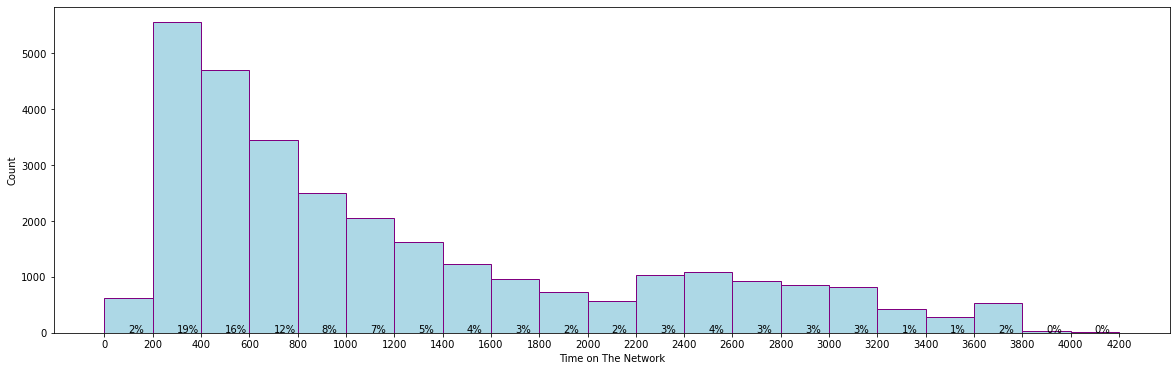

In [220]:
## lets check the number of days the customer is using the operator network and plot it
fig, ax = plt.subplots(figsize=(20,6))
c, bins, patches = ax.hist(customers_70_percentile['aon'],bins=range(0,customers_70_percentile['aon'].max(),round(200)), facecolor='lightblue', edgecolor='purple')
ax.set_xticks(bins)
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(c, bin_centers):
    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / c.sum())
    ax.annotate(percent, xy = (x,0.4))

ax.set_xlabel('Time on The Network')
ax.set_ylabel('Count')
plt.show()


In [221]:
customers_70_percentile['aon'].describe()

count    30001.000000
mean      1209.368754
std        957.677989
min        180.000000
25%        460.000000
50%        846.000000
75%       1756.000000
max       4321.000000
Name: aon, dtype: float64

as we can see from the above:
 The minimum time on the network is 180 days
 Around 30% of the High Value Customers are on thier 2nd year on the network
 The average time a customer is on the network is 1209 days, which is roughly 3.31 years
 About 13% of the customers have been with the network for over 7 years

Text(0, 0.5, 'Avg. Coming MOU')

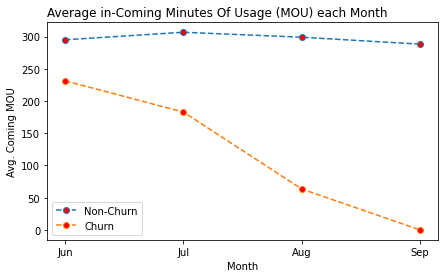

In [246]:
## lets plot out the churn vs non-churn for each of the months for jun-sep
coming_columns = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_ic_mou_9']
fig, ax = plt.subplots(figsize=(7,4))
df = customers_70_percentile.groupby(['churn'])[coming_columns].mean().T
plt.plot(df,linestyle='dashed', marker='o',markerfacecolor='red')
ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
plt.legend(['Non-Churn', 'Churn'])
# Add titles
plt.title("Average in-Coming Minutes Of Usage (MOU) each Month", loc='left', fontsize=12)
plt.xlabel("Month")
plt.ylabel("Avg. Coming MOU")

As we can see from above that the churners incoming average linearly drops from june to september
the non churners are very steady and are almost flat, and from june to july it increases abit but then plateaus

Text(0, 0.5, 'Avg. Out-Going Minutes Of Usage')

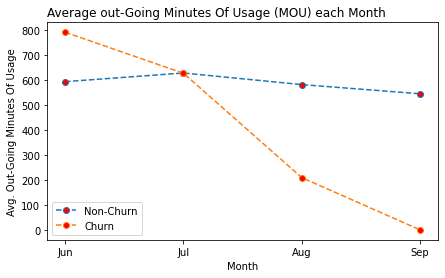

In [245]:
going_columns = ['total_og_mou_6','total_og_mou_7','total_og_mou_8','total_og_mou_9']
fig, ax = plt.subplots(figsize=(7,4))
df = customers_70_percentile.groupby(['churn'])[going_columns].mean().T
plt.plot(df, linestyle='dashed',marker='o',markerfacecolor='red')
ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
plt.legend(['Non-Churn', 'Churn'], loc=3)
# Add titles
plt.title("Average out-Going Minutes Of Usage (MOU) each Month", loc='left', fontsize=12)
plt.xlabel("Month")
plt.ylabel("Avg. Out-Going Minutes Of Usage")

for outgoing it seems to have a similar pattern to incoming, the churners have a steeper regression compared to non-churners, the churners seem to have a similar pattern for our going and in coming minutes of usage each month
the non-churners again have a steady and consisten plot, there isn't a sudden increase nor a decrease in the plot

Text(0.5, 1.0, 'Churned vs Non-Churned')

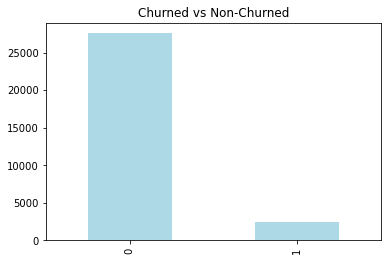

In [252]:
customers_70_percentile['churn'].value_counts().plot(kind='bar', color='lightblue').set_title('Churned vs Non-Churned')

In [265]:
customers_70_percentile=customers_70_percentile.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],1)


In [270]:
for i in range(6,9):
    customers_70_percentile['date_of_last_rech_'+str(i)] = customers_70_percentile['date_of_last_rech_'+str(i)].astype('category')
    customers_70_percentile['date_of_last_rech_data_'+str(i)] = customers_70_percentile['date_of_last_rech_data_'+str(i)].astype('category')
    

In [271]:
categorical_cols = customers_70_percentile.select_dtypes(['category']).columns
customers_70_percentile[categorical_cols] = customers_70_percentile[categorical_cols].apply(lambda x: x.cat.codes)

# Modelling

    Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

    It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By     knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

    It will be used to identify important variables that are strong predictors of churn. These variables may also         indicate why customers choose to switch to other networks.
    

In [403]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from imblearn.over_sampling  import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

In [277]:
customers_70_percentile_pca = customers_70_percentile.copy()

In [279]:
customers_70_percentile_pca.drop(['mobile_number'], axis=1, inplace=True)
date_columns = list(customers_70_percentile_pca.select_dtypes(include=['datetime64']).columns)
customers_70_percentile_pca.drop(date_columns, axis=1, inplace=True)





In [287]:
        
cols_to_drop = ['last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']



In [288]:
len(customers_70_percentile_pca.select_dtypes(include=['datetime64']).columns)

customers_70_percentile_pca.drop(cols_to_drop, axis=1, inplace=True)

In [289]:
scaler = MinMaxScaler()

In [290]:
## split our data into train test
y = customers_70_percentile_pca['churn']
X = customers_70_percentile_pca.drop('churn', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [291]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [292]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21000, 230), (9001, 230), (21000,), (9001,))

In [260]:
## well rescale the values of xtrain and xtest
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [293]:
# ## now well pca for dimentionality reduction
# pca = PCA(svd_solver='randomized', random_state=42)
# pca.fit(X_train)

In [405]:
# ## Handling class imbalance 
# smote = SMOTE(random_state=42)
# X_train_han, y_train_han = smote.fit_sampl(X_train, y_train)

In [297]:
## perform PCA
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train)
pca.components_


array([[-3.14878037e-03, -2.24892918e-03, -1.35228177e-03, ...,
         9.19525377e-03, -3.04332515e-03,  6.65623900e-03],
       [ 2.55008963e-03,  5.51293695e-03,  9.62351415e-03, ...,
        -5.36410718e-03,  4.58103108e-03, -2.13915707e-03],
       [ 5.68099515e-03, -1.95954600e-03, -2.50078002e-04, ...,
        -2.16654109e-03,  1.40825810e-03, -1.13871113e-03],
       ...,
       [-0.00000000e+00, -6.26215339e-17, -2.91215040e-16, ...,
        -5.34412517e-13,  1.78218542e-12,  5.75000828e-13],
       [-0.00000000e+00, -9.96167973e-17,  9.01028188e-17, ...,
        -5.31288609e-12,  7.90426380e-12,  5.71518659e-12],
       [ 0.00000000e+00, -2.97071225e-16, -2.45631422e-16, ...,
         1.53809807e-12, -4.22097562e-12, -1.65467776e-12]])

In [298]:
pca.explained_variance_ratio_

array([5.30182846e-01, 8.01501821e-02, 5.50046166e-02, 4.75488336e-02,
       4.21666325e-02, 2.65666600e-02, 2.35236688e-02, 2.10939909e-02,
       1.84180357e-02, 1.55313763e-02, 9.44769925e-03, 8.88487597e-03,
       7.81014583e-03, 7.47184130e-03, 5.64981273e-03, 5.27013000e-03,
       4.35309643e-03, 3.84223441e-03, 3.61619781e-03, 3.53457610e-03,
       3.33233974e-03, 3.19591422e-03, 3.15242821e-03, 2.97741154e-03,
       2.84406650e-03, 2.79508303e-03, 2.75915720e-03, 2.70146618e-03,
       2.54304916e-03, 2.41686429e-03, 2.15560722e-03, 2.05170293e-03,
       1.99758729e-03, 1.81536237e-03, 1.77700464e-03, 1.71037963e-03,
       1.57756693e-03, 1.55004479e-03, 1.44056095e-03, 1.37269482e-03,
       1.28234944e-03, 1.18820478e-03, 1.16057842e-03, 1.14523167e-03,
       1.03980522e-03, 9.91446877e-04, 9.09221426e-04, 8.96419626e-04,
       8.65061345e-04, 8.46427586e-04, 7.87540234e-04, 7.71877686e-04,
       7.33356904e-04, 7.05657417e-04, 6.77512480e-04, 6.65037341e-04,
      

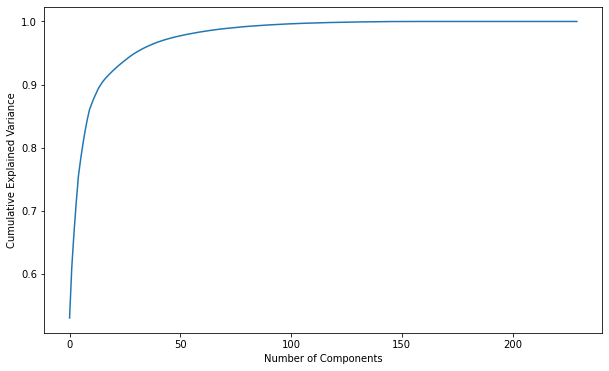

In [302]:
fig = plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [304]:
## looking at the graph above, we can see that around 60 is the right number of components to keep after that
# the graph plateaus and it doesnt make sense to keep all of it when we can make good prediction with fraction of them

In [305]:
incremental_pca = IncrementalPCA(n_components=60)
incremental_pca_train = incremental_pca.fit_transform(X_train)


In [307]:
incremental_pca_train.shape

(21000, 60)

In [308]:
## we can see now we only have 60 columns or dimensions

In [309]:
## lets create a correlation matrix of the coefficients
correlation_matrix = np.corrcoef(incremental_pca_train.transpose())

In [310]:
correlation_matrix

array([[ 1.00000000e+00,  1.87693281e-09,  2.73896924e-09, ...,
         1.42733328e-06, -6.19694611e-07,  2.45382607e-06],
       [ 1.87693281e-09,  1.00000000e+00, -5.60705084e-09, ...,
        -2.63775716e-06, -2.76172581e-06,  2.35354605e-05],
       [ 2.73896924e-09, -5.60705084e-09,  1.00000000e+00, ...,
         1.96623379e-05,  1.48157223e-05, -4.48885504e-05],
       ...,
       [ 1.42733328e-06, -2.63775716e-06,  1.96623379e-05, ...,
         1.00000000e+00,  9.56925900e-03, -1.05794341e-02],
       [-6.19694611e-07, -2.76172581e-06,  1.48157223e-05, ...,
         9.56925900e-03,  1.00000000e+00, -8.39007661e-04],
       [ 2.45382607e-06,  2.35354605e-05, -4.48885504e-05, ...,
        -1.05794341e-02, -8.39007661e-04,  1.00000000e+00]])

In [311]:
res =correlation_matrix - np.diagflat(correlation_matrix.diagonal())

array([[ 0.00000000e+00,  1.87693281e-09,  2.73896924e-09, ...,
         1.42733328e-06, -6.19694611e-07,  2.45382607e-06],
       [ 1.87693281e-09,  0.00000000e+00, -5.60705084e-09, ...,
        -2.63775716e-06, -2.76172581e-06,  2.35354605e-05],
       [ 2.73896924e-09, -5.60705084e-09,  0.00000000e+00, ...,
         1.96623379e-05,  1.48157223e-05, -4.48885504e-05],
       ...,
       [ 1.42733328e-06, -2.63775716e-06,  1.96623379e-05, ...,
         0.00000000e+00,  9.56925900e-03, -1.05794341e-02],
       [-6.19694611e-07, -2.76172581e-06,  1.48157223e-05, ...,
         9.56925900e-03,  0.00000000e+00, -8.39007661e-04],
       [ 2.45382607e-06,  2.35354605e-05, -4.48885504e-05, ...,
        -1.05794341e-02, -8.39007661e-04,  0.00000000e+00]])

In [314]:
corr_mat_min = res.min()
corr_mat_max = res.max()
print("min correlation : "+str(corr_mat_min)+":  Max Correlation: "+ str(corr_mat_max))

min correlation : -8284:  Max Correlation: 30205


In [316]:
# now we'll apply the pca to the testing set

pca_test = incremental_pca.transform(X_test)

In [318]:
pca_test.shape

(9001, 60)

In [ ]:
## the test has also been reduced to 60 dimensions


Well try the following algorithms on the data set and pick the best performing one
    `Logisting Regression`
    `Decision Tree`
    `Random Forrest`
    `XGBoost`

### Logistic Regression

In [321]:
lr = LogisticRegression()

In [328]:
lr.fit(incremental_pca_train, y_train)
        
#Predict training set:
dtrain_predictions = lr.predict(incremental_pca_train)
dtrain_predprob = lr.predict_proba(incremental_pca_train)[:,1]

#Perform cross-validation:
cv_score = cross_val_score(lr, incremental_pca_train, y_train, cv=5, scoring='roc_auc')

#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
# print ("CV Score : Mean - %.7g\nStd - %.7g\nMin - %.7g\nMax - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    


Model Report
Accuracy : 0.826
Recall/Sensitivity : 0.6661
AUC Score (Train): 0.984716


In [331]:
test_set_predict = lr.predict(pca_test)


In [ ]:
getModelMetrics(y_test,pred_probs_test)

In [338]:
cm = metrics.confusion_matrix(y_test, test_set_predict)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
roc = metrics.roc_auc_score(y_test,test_set_predict)
sens = TP / float(TP + FN)
spec = TN / float(TN + FP)
fpr = FP / float(TN + FP)
ppr = TP / float(TP + FP)
npr = TN / float(TN + FN)
ps = metrics.precision_score(y_test, test_set_predict)
print("roc_auc_score : {}".format(roc))
print('Sensitivity/Recall : {}'.format(sens))
print('Specificity: {}'.format(spec))
print('False Positive Rate: {}'.format(fpr))
print('Positive predictive Rate: {}'.format(ppr))
print('Negative Predictive Rate: {}'.format(npr))
print('Precision score: {}'.format(ps))

roc_auc_score : 0.8312908409672928
Sensitivity/Recall : 0.6747503566333809
Specificity: 0.9878313253012048
False Positive Rate: 0.01216867469879518
Positive predictive Rate: 0.8240418118466899
Negative Predictive Rate: 0.9729441082235671
Precision score: 0.8240418118466899


In [339]:
train_pred_prob = lr.predict_proba(incremental_pca_train)[:,1]

In [340]:
train_pred_prob

array([6.91934902e-01, 8.96550314e-03, 2.47625664e-02, ...,
       1.97206319e-01, 5.58565159e-03, 6.69723620e-04])

In [341]:
print("roc_auc_score(on training set) {:2.2}".format(metrics.roc_auc_score(y_train, train_pred_prob)))


roc_auc_score(Train) 0.98


In [348]:
prob_predic = lr.predict_proba(incremental_pca_train)[:,1]
new_df= pd.DataFrame({'churn':y_train, 'probability_churn':prob_predic})
new_df['final_predicted'] = new_df.probability_churn.map( lambda x: 1 if x > 0.5 else 0)

cm = metrics.confusion_matrix(new_df['churn'], new_df['final_predicted'])
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
roc = metrics.roc_auc_score(new_df['churn'],new_df['final_predicted'])
sens = TP / float(TP + FN)
spec = TN / float(TN + FP)
fpr = FP / float(TN + FP)
ppr = TP / float(TP + FP)
npr = TN / float(TN + FN)
ps = metrics.precision_score(new_df['churn'], new_df['final_predicted'])
print("roc_auc_score : {}".format(roc))
print('Sensitivity/Recall : {}'.format(sens))
print('Specificity: {}'.format(spec))
print('False Positive Rate: {}'.format(fpr))
print('Positive predictive Rate: {}'.format(ppr))
print('Negative Predictive Rate: {}'.format(npr))
print('Precision score: {}'.format(ps))

roc_auc_score : 0.8259847101371431
Sensitivity/Recall : 0.6660919540229885
Specificity: 0.985877466251298
False Positive Rate: 0.014122533748701973
Positive predictive Rate: 0.8099231306778477
Negative Predictive Rate: 0.9703101844754458
Precision score: 0.8099231306778477


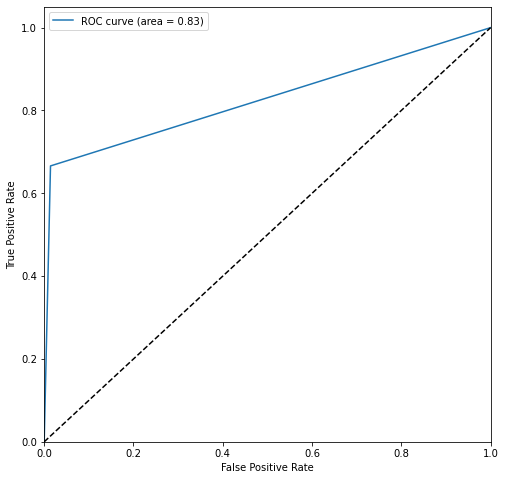

In [352]:
# def draw_roc( actual, probs ):
fpr, tpr, thresholds = metrics.roc_curve( new_df['churn'], new_df['final_predicted'])
auc_score = metrics.roc_auc_score( new_df['churn'], new_df['final_predicted'] )
plt.figure(figsize=(8, 8))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="upper left")
plt.show()


In [353]:
print(fpr, tpr, thresholds)

[0.         0.01412253 1.        ] [0.         0.66609195 1.        ] [2 1 0]


In [354]:
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(new_df['churn'], new_df['final_predicted'])))

roc_auc_score : 0.83


train sensitivity : 84.47%, train roc auc score : 83.4%
test sensitivity : 81.72%, test roc auc score : 79.34%


### Random Forest

In [356]:
rfc = RandomForestClassifier()

In [357]:
rfc.fit(incremental_pca_train,y_train)

RandomForestClassifier()

In [358]:
predictions = rfc.predict(pca_test)

In [359]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8300
           1       0.85      0.34      0.49       701

    accuracy                           0.94      9001
   macro avg       0.90      0.67      0.73      9001
weighted avg       0.94      0.94      0.93      9001



In [360]:
predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [365]:
## we'll try gridSearch with Cross validation
param_grid = {'max_depth': [2,6,8,10],
              'min_samples_leaf': [100,150,200],
              'min_samples_split': [100,200,300],
              'n_estimators':[50,100,150,200],
              'max_features':[3,4,6]
             
             }

In [366]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring= 'roc_auc', 
                          cv = 5, n_jobs = -1,verbose = 1)

In [367]:
grid_search.fit(incremental_pca_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 6, 8, 10], 'max_features': [3, 4, 6],
                         'min_samples_leaf': [100, 150, 200],
                         'min_samples_split': [100, 200, 300],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='roc_auc', verbose=1)

In [368]:
grid_search.best_score_, grid_search.best_params_

(0.960313495900025,
 {'max_depth': 10,
  'max_features': 6,
  'min_samples_leaf': 100,
  'min_samples_split': 100,
  'n_estimators': 200})

In [369]:
## we found the best parameters for our model and now well trainit using those parameters 

rfc = RandomForestClassifier(bootstrap=True, max_depth=10,min_samples_leaf=100, min_samples_split=100,max_features=6,n_estimators=200)

In [377]:
rfc.fit(incremental_pca_train,y_train)
preds = rfc.predict(pca_test)

In [371]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8300
           1       0.85      0.34      0.49       701

    accuracy                           0.94      9001
   macro avg       0.90      0.67      0.73      9001
weighted avg       0.94      0.94      0.93      9001



In [376]:
print(metrics.confusion_matrix(y_test, preds))
print("accuracy", metrics.accuracy_score(y_test, preds))
print("precision", metrics.precision_score(y_test, preds))
print("roc_auc_score", metrics.roc_auc_score(y_test, preds))

[[8256   44]
 [ 461  240]]
accuracy 0.9438951227641373
precision 0.8450704225352113
roc_auc_score 0.6685334204148978


### XGBoost

In [399]:
model = GradientBoostingClassifier(random_state=42)
model.fit(incremental_pca_train, y_train)
y_pred = model.predict(pca_test)

In [404]:
acc_score = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy Score : ',acc_score)

roc_score = round(roc_auc_score(y_test, y_pred)*100,2)
print('ROC AUC score : ',roc_score)

prec_score = round(precision_score(y_test, y_pred)*100,2)
print('Precision score : ', prec_score)

rec_score = round(recall_score(y_test, y_pred)*100,2)
print('Recall score : ', rec_score)

# model_score_list.append({'model_name':'XGBClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


Accuracy Score :  95.09
ROC AUC score :  75.53
Precision score :  77.26
Recall score :  52.35


### Insights based on data

The best model for our data is Logistic Regression modle with probability cut-off of 0.5. it gave us a recal of 83% and ROC of 98% on the test data. The accuracy specificity and precision of the training and testing data were consistant.
the churners incoming average linearly drops from june to september, the non-churners are very steady and are almost flat, and from june to july it increases abit but then plateaus.

for outgoing it seems to have a similar pattern to incoming, the churners have a steeper regression compared to non-churners, the churners seem to have a similar pattern for out-going and in-coming minutes of usage each month, the non-churners again have a steady and consisten plot, there isn't a sudden increase nor a decrease in the plot.

### what values seem to affect the churn the most
 - The month of August seems to have the most effect on customer churning
 - The churn rate is lowest in August, as well as the ougoing and incoming calls
 - The number of local and total in-coming and out-going calls are again in decrease in that month
 
 
### Recommendations
 - The company needs to pay close attention to roaming charges, those who churn  have higher roaming than those who dont, and the company and give better roaming options to those who use it alot
 - Since the correlation between churning and roaming is high, those who use roaming alot might not be getting a good service in the location they are roaming, so better network architecture might be useful
 - Customers have low recharge in the months before churning, so it could indicate that there is a high correlation between decrease of recharge and churning the next month, the company could look at those customers who decrease recharge and before the end of the month could give them a better deal to stop them from churning
